# Airplane crushes analysis (1919-2023) 

#### Camilla Bonomo for International Alliance for Safe Skies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import unicodedata
import seaborn as sns

In [4]:
%matplotlib inline

In [89]:
'''
modify visualisations layout
'''
plt.rcParams['figure.figsize'] = [12, 6]

In [7]:
'''
Dataframe of the given data (cvs file) on worldwide airplane crushes from 1919 to 2023
'''
BASE='https://proai-datasets.s3.eu-west-3.amazonaws.com/'
df= pd.read_csv(BASE+'aviation-accidents.csv')
df.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

#### cleaning phase

In [25]:
'''
acquiring information about the full dataframe
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [26]:
'''
'Fatalities' values are not int or float but objects, 
so they need to be transformed in order to be computed.
'''
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['fatalities'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23967 entries, 0 to 23966
Series name: fatalities
Non-Null Count  Dtype  
--------------  -----  
19676 non-null  float64
dtypes: float64(1)
memory usage: 187.4 KB


In [27]:
'''
Calculate number of NaN values and consequent drop if needed.
'''
df.isna().sum()

date               0
type               0
registration    1548
operator           4
fatalities      4291
location         948
country            0
cat                0
year               0
dtype: int64

In [28]:
df=df.dropna()
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [29]:
'''
'Registration' and 'cat' are not informative -> drop
'''
df= df.drop(['registration','cat'],axis=1)
df.shape

(18298, 7)

In [30]:
'''
Normalization of the strings
'''
def normalize_unicode(df, columns):
    """
    Normalizes Unicode strings of a dataframe for the specified columns.

    Parameters:
    df (pd.DataFrame): dataframe
    columns (list): list of columns 

    Returns:
    pd.DataFrame: dataframe with normalized columns
    """
    for column in columns:
        df[column] = df[column].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('ascii') if isinstance(x, str) else x)
    return df


df= normalize_unicode(df,['type','operator','location','country'])

In [31]:
'''
Save the cleaned Dataframe
'''
df.to_csv('aviation_accidents_cleaned.csv')

## Analysis

### Q1: General evolution of airplanes' accidents over time (from 1919-2023)


In [8]:
'''
Import the cleaned DataFrame
'''
df=pd.read_csv('aviation_accidents_cleaned.csv',index_col=0)
df.head()

,date,type,operator,fatalities,location,country,year
4,date unk.,Antonov An-12BP,Soviet AF,0.0,Massawa Airport ...,Eritrea,unknown
7,date unk.,Antonov An-2,Aeroflot,0.0,Chita region,Russia,unknown
9,date unk.,Antonov An-26,Soviet AF,0.0,Orenburg Air Base,Russia,unknown
10,date unk.,Antonov An-26,Russian AF,0.0,Belgorod Airport...,Russia,unknown
13,date unk.,Antonov An-2R,PZL-Mielec,0.0,Mielec,Poland,unknown


In [8]:
'''
Retrive Serie from the main df of all the known years
'''
y_ser= df['year'].loc[df['year']!= 'unknown']
y_ser.shape

(18282,)

In [9]:
'''
Covert year values to Pandas type(datetime) 
'''
y_ser= pd.to_datetime(y_ser)

In [27]:
'''
Frequency calculation for the rappresentation of the historical series
'''
y_freq= dict(y_ser.value_counts())
y_freq_sorted= dict(sorted(y_freq.items()))
type(y_freq_sorted)

dict

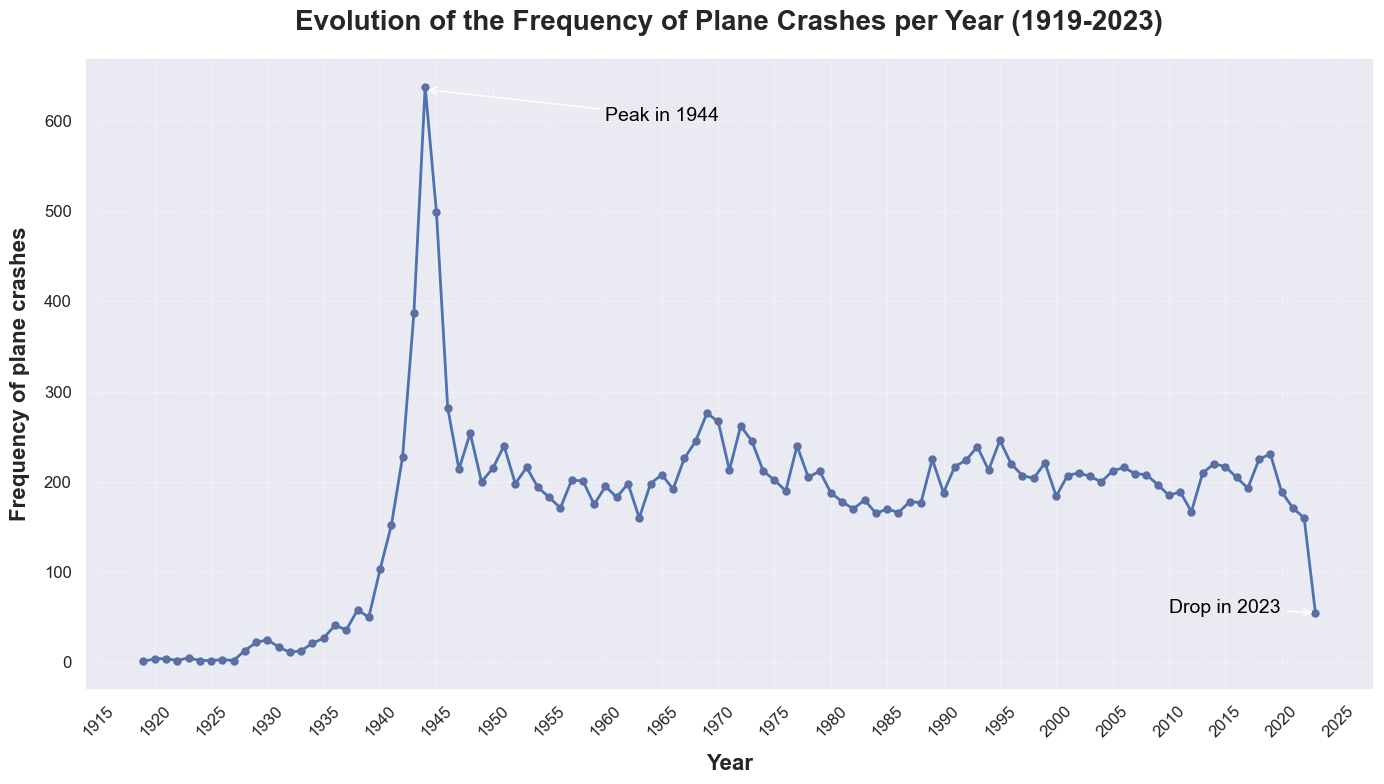

In [28]:
'''
Historical serie visualization
'''
#graph style and markers
sns.set(style='dark')

plt.plot(y_freq_sorted.keys(), y_freq_sorted.values(), marker='o', linestyle='-', color='b', linewidth=2, markersize=4, markerfacecolor='r', markeredgewidth=2)

#axis layout
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.xlabel('Year', fontsize=16, fontweight='bold', labelpad=10)  
plt.ylabel('Frequency of plane crashes', fontsize=16, fontweight='bold', labelpad=10)  
plt.title('Evolution of the Frequency of Plane Crashes per Year (1919-2023)', fontsize=20, fontweight='bold', pad=20)

#ticks layout with rotations
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

#grid layout
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

#annotations
plt.annotate('Peak in 1944', xy=(pd.Timestamp('1944-01-01'), 635), xytext=(pd.Timestamp('1960-01-01'), 600),
             arrowprops=dict(facecolor='white', arrowstyle='->'), fontsize=14, color='black')

plt.annotate('Drop in 2023', xy=(pd.Timestamp('2023-01-01'), 55), xytext=(pd.Timestamp('2010-01-01'), 55),
             arrowprops=dict(facecolor='white', arrowstyle='->'), fontsize=14, color='black')

#saving the graph as .png file
plt.savefig('evolution_crash_freq.png')

plt.tight_layout()  
plt.show()

In [94]:
'''
Creation of a .docx file in order to obtain a clean report with all the usefull viz
'''
from docx import Document
from docx.shared import Inches

#function for adding a graph to the file
def add_plot_to_doc(document, image_path):
    document.add_picture(image_path, width=Inches(7),height=Inches(4))

#creation of the file
file= Document()
file.add_heading('Report: Airplane crashes analysis (1919-2023)\nCamilla Bonomo for International Alliance for Safe Skies ', 0)

In [95]:
'''
Add the graph to the document with comments
'''
#comments
file.add_paragraph('The dataset of airplane accidents (1919-2023) include tons of data and information. Starting from this dataset it is possible to collect usefull insights. ')
file.add_paragraph('The first visualisation is showing the evolution of airplane accidents over time.\n Here it is possible to define a peak in 1944 (period of geopolitcal tension and WWII) and a drop in 2023.')

#graph
add_plot_to_doc(file,'evolution_crash_freq.png')

In [96]:
file.save('Report_Bonomo.docx')

## Q2: In which country did plane crashes occur most frequently ?

In [41]:
'''
Retrieve the Serie with all the known countries registered in the main df
'''
country_ser= df['country'].loc[df['country']!= 'Unknown country']
country_ser.shape

(18266,)

In [101]:
'''
Creation of a new dataframe with 'country' and 'frequency'(how many times a country has been registered)
for creating a viz that informs on locations of the registered plane crashes and how many of the latter occured in each country.
'''
country_dict=dict(country_ser.value_counts())

country_list=[[key,value]for key,value in country_dict.items()]
columns=['Country','Total crashes']

country_df=pd.DataFrame(country_list,columns=columns)

'''
selecting the first 50 country for nr of crashes
'''
country_df=country_df.head(50)
country_df.head()

,Country,Total crashes
0,USA,3746
1,Russia,1185
2,Canada,779
3,U.K.,700
4,Brazil,550


In [93]:
'''
Import of dataset with information for creation of a cartogram viz
'''
import geopandas as gpd
world=gpd.read_file('ne_110m_admin_0_countries.shp')
world.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [94]:
'''
In our dataset USA and UK are written in the short form 
(incompatible with the extended for of many other datasets usefull for the creation of the viz).

So here is the replacement of those strings with the extended version of the name.
'''
country_df['Country']=country_df['Country'].replace('USA','United States of America')
country_df['Country']=country_df['Country'].replace('U.K.','United Kingdom')

In [95]:
gdf=gpd.GeoDataFrame(country_df)

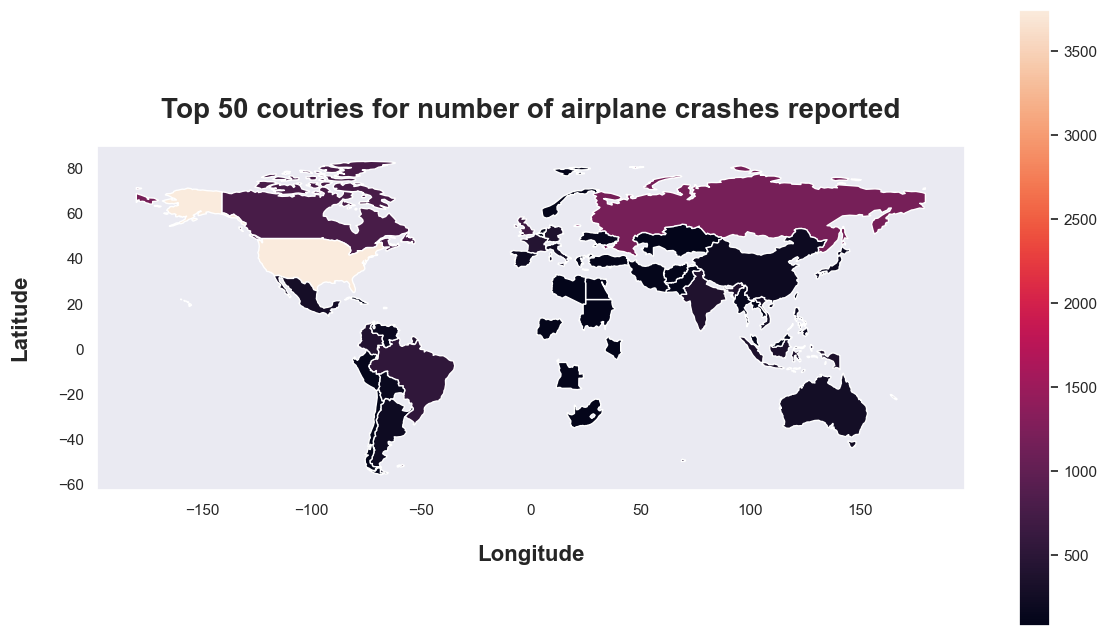

In [100]:
'''
merging of the two dataframes and visualization of the cartogram
'''
merged = world.merge(gdf,left_on='SOVEREIGNT',right_on='Country')
merged.plot(column='Total crashes', legend=True)

#axis features
plt.title('Top 50 coutries for number of airplane crashes reported',fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Longitude',fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel('Latitude',fontsize=16, fontweight='bold', labelpad=20)

#saving the graph as .png file
plt.savefig('cartogram.png')

plt.show()

In [97]:
'''
Add the cartogram to the document with comments
'''
#comments
file.add_paragraph('During this 105 years the country that has registered the highest number of airplane crashes on its territory is the USA, followed by Russia, Canada,UK and Brazil.')

#graph
add_plot_to_doc(file,'cartogram.png')

In [98]:
file.save('Report_Bonomo.docx')

## Q3: Considering the country with the highest number of accidents (USA), which operators are responsible for them?

In [114]:
'''
Retrieve a sub-set with the USA operators
'''
usa_df= df[['country','operator']].loc[df['country']=='USA']
usa_df.shape

(3746, 2)

In [116]:
'''
Caluclating the freqiences for each operator in order to establish the registered crashes made by each of them
'''
operators_count=dict(usa_df['operator'].value_counts())

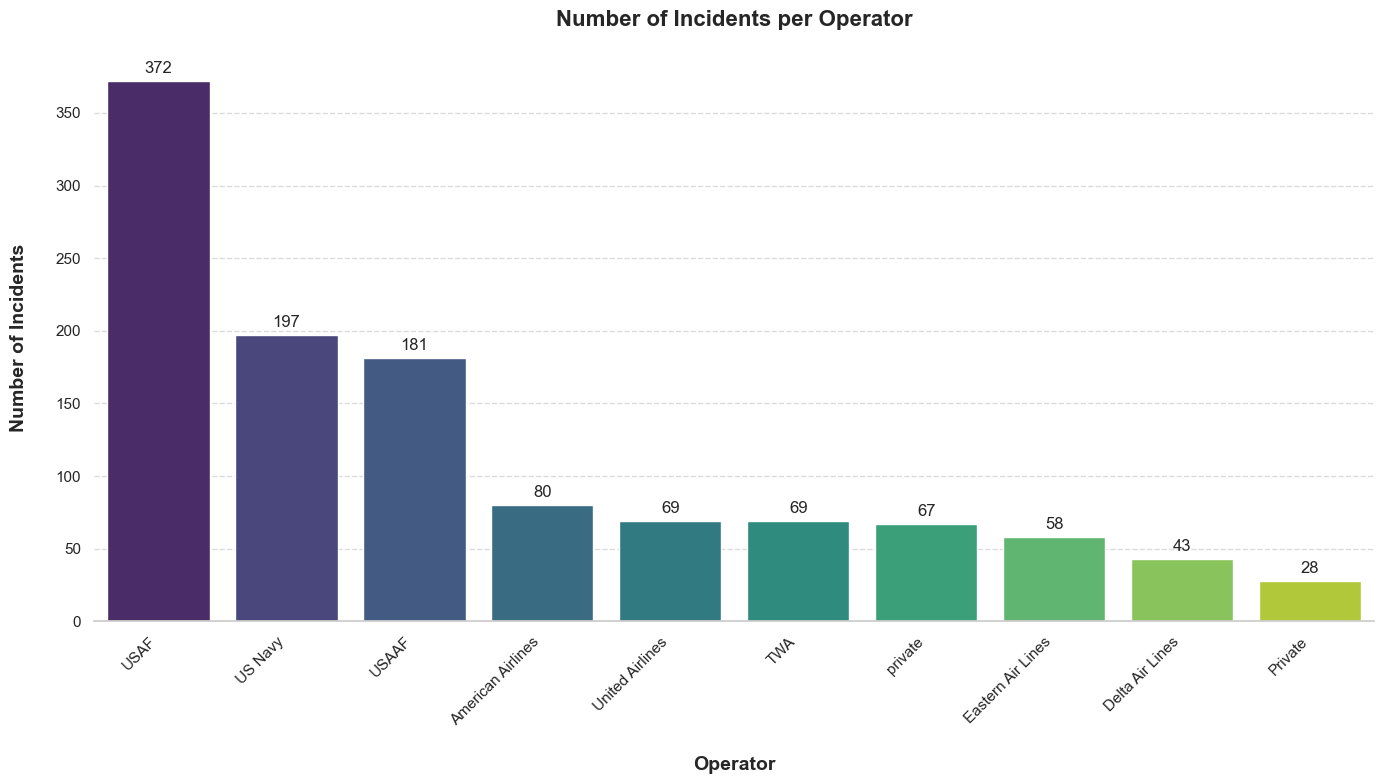

In [121]:
'''
Creating a diagram showing the top 10 operators that have done the highest number of crashes in USA
'''
categories=list(operators_count.keys())
values=list(operators_count.values())

sns.set(style="whitegrid")

# diagram with Seaborn
bar_plot = sns.barplot(x=categories[:10], y=values[:10], palette='viridis')

# titles of graph and axies
bar_plot.set_title('Number of Incidents per Operator', fontsize=16, fontweight='bold', pad=20)
bar_plot.set_xlabel('Operator', fontsize=14, fontweight='bold', labelpad=20)
bar_plot.set_ylabel('Number of Incidents', fontsize=14,fontweight='bold', labelpad=20)

# ticks
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=12)

# layout of the graph
sns.despine(left=True)
bar_plot.grid(True, axis='y', linestyle='--', alpha=0.7)

# rotation of the thicks under the bars
plt.xticks(rotation=45, ha='right')

#saving the graph as .png file
plt.savefig('Incidents_usa_operators.png')

plt.tight_layout()
plt.show()

In [99]:
'''
Add the diagram to the document with comments
'''
#comments
file.add_paragraph('Considering the accidents in USA, it is clear that the operator USAF was the most resposible for them.')

#graph
add_plot_to_doc(file,'Incidents_usa_operators.png')

In [100]:
file.save('Report_Bonomo.docx')

In [12]:
'''
Extracting the total number of fatalities for the USAF operator in the USA
'''
usaf_fatal_df= df[['country','operator','fatalities','type']].loc[df['operator']=='USAF']
usaf_fatal_df=usaf_fatal_df.loc[usaf_fatal_df['country']=='USA']

#calculating total fatalities
usaf_fatal= usaf_fatal_df['fatalities'].sum()
print(f'The total number of fatalities coused by USAF operator in the USA in 105 years is {usaf_fatal}')

The total number of fatalities coused by USAF operator in the USA in 105 years is 1909.0


In [18]:
'''
Extracting the USAF types of airplane responsible of the highest values of fatalities
'''
type_fatal_df=usaf_fatal_df.drop(['country','operator'],axis=1)
grouped_df= type_fatal_df.groupby('type').sum().sort_values(by='fatalities', ascending=False)

#selecting the top 10
type_most_fatal=grouped_df.head(10)
type_most_fatal.head(10)

,fatalities
type,
Boeing KC-135A,228.0
Douglas C-124A Globemaster II,184.0
Douglas C-47D (DC-3),112.0
Lockheed C-130E Hercules,95.0
Fairchild C-119C Flying Boxcar,92.0
Douglas C-47A (DC-3),89.0
Boeing C-135A,84.0
Douglas C-47B (DC-3),69.0
Douglas VC-47D (DC-3),67.0


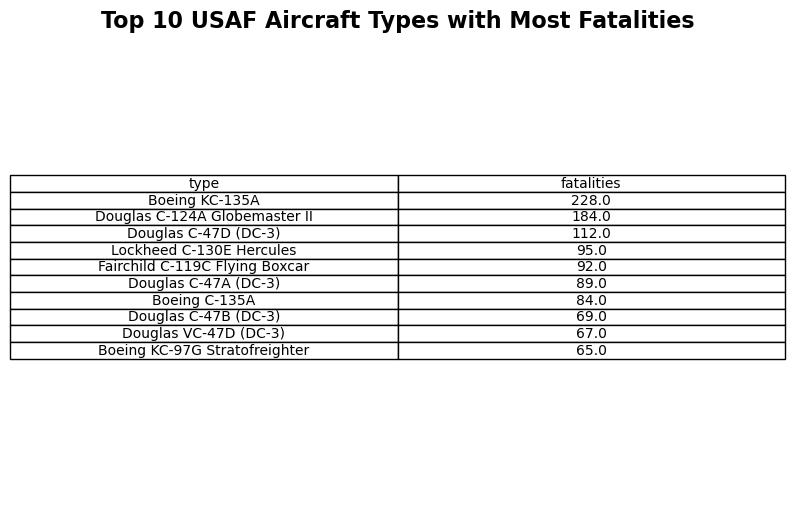

In [21]:
'''
Saving the table as a .png file for its inclusion on the .docx file
'''
# plotting the DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=type_most_fatal.reset_index().values,
                 colLabels=type_most_fatal.reset_index().columns,
                 cellLoc='center', 
                 loc='center')

plt.title('Top 10 USAF Aircraft Types with Most Fatalities', fontsize=16, fontweight='bold')
plt.savefig('type_most_fatal_table.png')
plt.show()

In [101]:
#paragraph on the docx
file.add_paragraph('It is showed by the data that USAF opearator has caused the most accidents in USA causing 1909 fatalities in 105 years of registrations.')

In [102]:
#add table
add_plot_to_doc(file,'type_most_fatal_table.png')

In [103]:
#paragraph on the docx
file.add_paragraph('Moreover, data are showing that the most dangerous type of USAF aircraft is the Boeing KC-135A with an ammount of 228 fatalities out of 1909.')

In [104]:
file.save('Report_Bonomo.docx')

## Q4: Which are the top 10 most dangerous type of aircraft in general?

In [42]:
'''
Retrieving onformation about the fatalities of each type of aircraft and the operator it belongs to
'''
most_fatal_df=df[['type','operator','fatalities']]
grouped_most_fatal=most_fatal_df.groupby(['operator','type']).sum().sort_values(by='fatalities', ascending=False)
top10_type=grouped_most_fatal.head(10)
top10_type

,,fatalities
operator,type,
USAAF,Douglas C-47A (DC-3),1751.0
RAF,Douglas Dakota IV (DC-3),567.0
USAAF,Douglas C-47 (DC-3),564.0
Air-India,Boeing 747-237B,542.0
Malaysia Airlines,Boeing 777-2H6ER,537.0
RAF,Douglas Dakota III (DC-3),531.0
JAL,Boeing 747SR-46,520.0
USAAF,Douglas C-47B (DC-3),488.0
German AF,Junkers Ju-52/3m,467.0


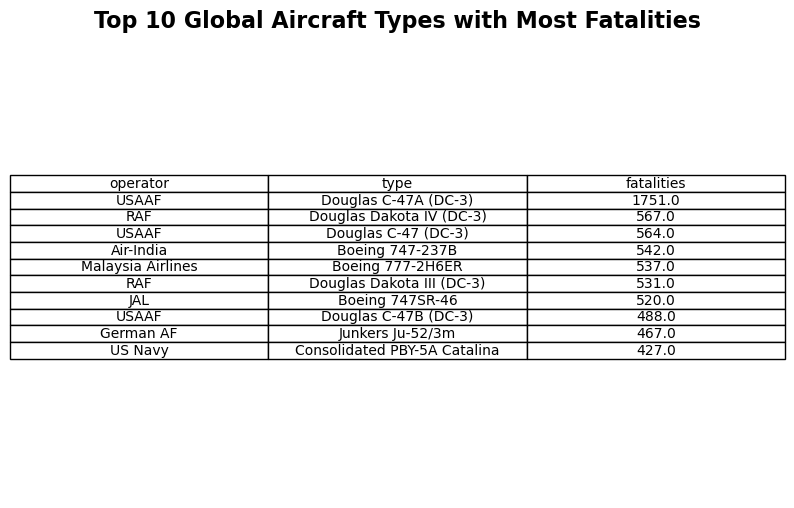

In [44]:
'''
Saving the table as a .png file for its inclusion on the .docx file
'''
# plotting the DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top10_type.reset_index().values,
                 colLabels=top10_type.reset_index().columns,
                 cellLoc='center', 
                 loc='center')

plt.title('Top 10 Global Aircraft Types with Most Fatalities', fontsize=16, fontweight='bold')
plt.savefig('type_global_most_fatal_table.png')
plt.show()

In [105]:
#paragraph on the docx
file.add_paragraph('Searching for the most dangerous type of aircraft among all the operators it has emerged that USAAF Douglas C-47A (DC-3) has caused 1751 fatalities all over the world.\nMoreover, it can be noticed that other two USAAF aircraft are present in this top 10 table, making us suppose that USAAF could be the most dangerous operator as reguards number of fatalities\nWe have already seen that this operator was at the 3rd place for number of accidents in the USA as well.')

In [106]:
#add table
add_plot_to_doc(file,'type_global_most_fatal_table.png')

In [107]:
file.save('Report_Bonomo.docx')

## Q5: Which are the most and least dangerous operators for number of accidents and for number of fatalities?

In [10]:
'''
Retrieving the Serie about operators for calculating the frequency of their registrations (nr. of accidnets reported)
'''
df_accidents= df['operator'].value_counts()

#operators with the most registered accidents
top5_accidents=df_accidents.head(5)

#operators with the least registered accidents
last5_accidents=df_accidents.tail(5)

In [16]:
'''
Retrieving the sub-set about operators and fatalities for calculating the most and least dangerous based on the nr. of fatalities
'''
df_fatal= df[['operator','fatalities']]

grouped_df_fatal= df_fatal.groupby('operator').sum()

#operators with the most fatalities
most_fatal= grouped_df_fatal.sort_values(by='fatalities', ascending=False)
most_fatal= most_fatal.head(5)

#operators with the least fatalities
least_fatal= grouped_df_fatal.sort_values(by='fatalities', ascending=True)
least_fatal= least_fatal.head(5)

(5, 1)

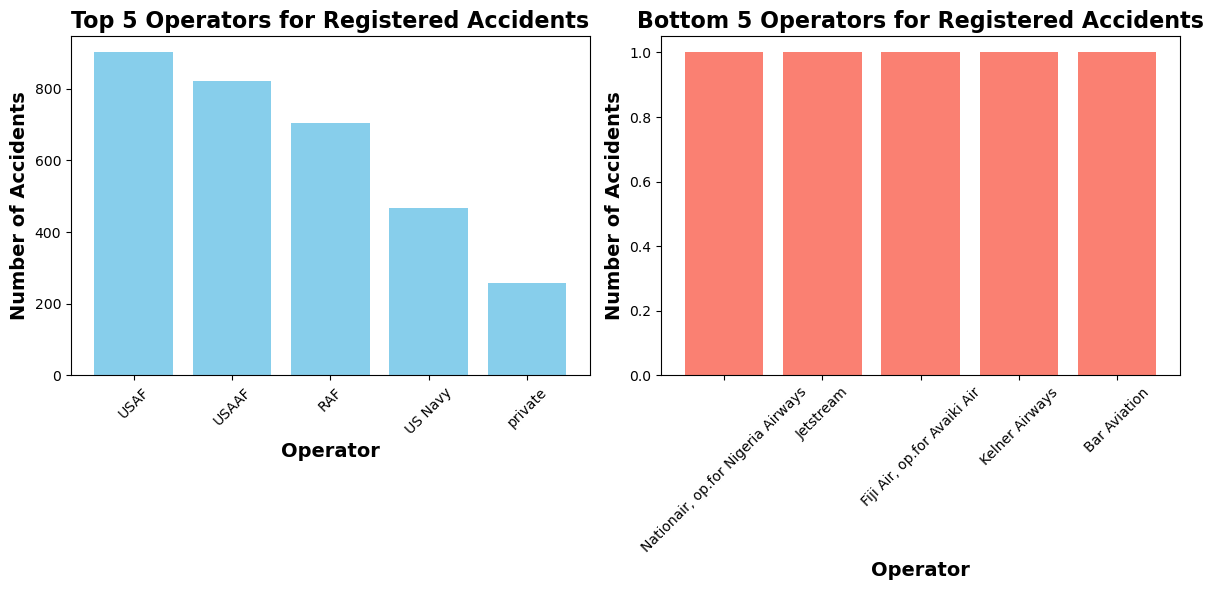

In [92]:
'''
Generating bar plots for showing the most and least dangerous operators for number of accidents made.
'''
# Creating the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Top 5 operators
axes[0].bar(top5_accidents.index,top5_accidents.values, color='skyblue')
axes[0].set_title('Top 5 Operators for Registered Accidents',fontsize=16, fontweight='bold')
axes[0].set_xlabel('Operator',fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Accidents',fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Last 5 operators
axes[1].bar(last5_accidents.index, last5_accidents, color='salmon')
axes[1].set_title('Bottom 5 Operators for Registered Accidents',fontsize=16, fontweight='bold')
axes[1].set_xlabel('Operator',fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Accidents',fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

#save plot as .png
plt.savefig('operators_accidents.png')

# Adjust layout
plt.tight_layout()

plt.show()

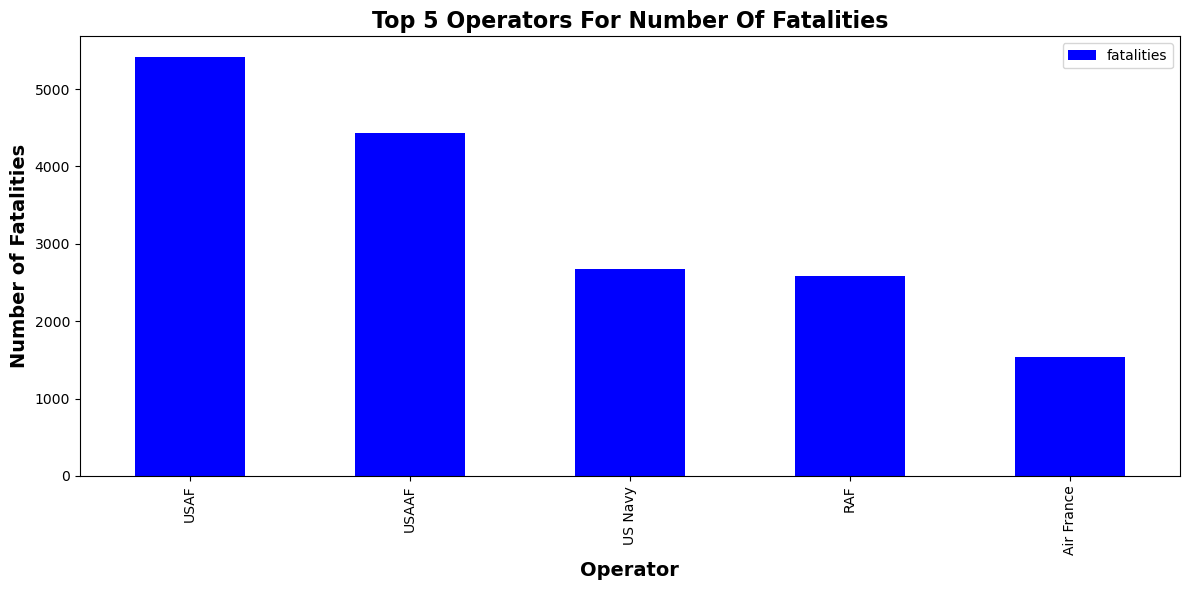

In [93]:
'''
creating a bar plot for showing the most dangerous operators for number of fatalities caused
'''
most_fatal.plot(kind='bar', y='fatalities', color='blue')

#set labels
plt.title('Top 5 Operators For Number Of Fatalities',fontsize=16, fontweight='bold')
plt.xlabel('Operator', fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', fontsize=14, fontweight='bold')

#save plot as .png
plt.savefig('operators_fatalities.png')

plt.tight_layout()
plt.show()

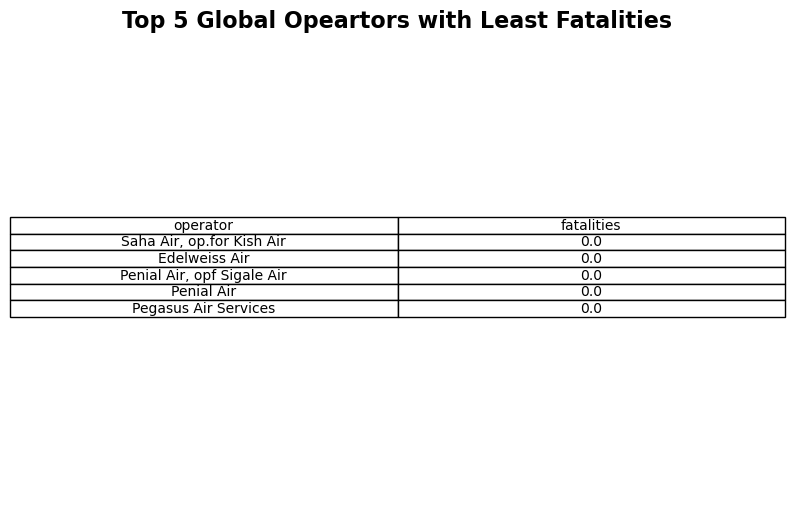

In [23]:
'''
Saving the table as a .png file for its inclusion on the .docx file
'''
# plotting the DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=least_fatal.reset_index().values,
                 colLabels=least_fatal.reset_index().columns,
                 cellLoc='center', 
                 loc='center')

plt.title('Top 5 Global Opeartors with Least Fatalities', fontsize=16, fontweight='bold')
plt.savefig('operators_least_fatal_table.png')
plt.show()

In [108]:
#paragraph on the docx
file.add_paragraph('At this point it is interesting to understand which operators are the most and least dangerous for number of accidents and for number of fatalities.')

#add chart
add_plot_to_doc(file,'operators_accidents.png')

#paragraph on the docx
file.add_paragraph('It emerges that USAF and USAAF confirm themselves as the operators with more registered accidents all over the world, while the operators on the graphs on the right (with slamon bars) are the safest for number of accidents on the top and fatalities on the bottom.\nIt also emerges that in the group of the safest operators, everyone has made at least 1 accidents.')

#add chart
add_plot_to_doc(file,'operators_fatalities.png')
add_plot_to_doc(file,'operators_least_fatal_table.png')

#paragraph on the docx
file.add_paragraph('the safest operators for number of fatalities may have done some accidents but they didnt caused any deaths; on the other hand, the safest operators for number of accidents have done just 1 accident cousing some fatalities.\nFinally, we can see that USAF and USAAF are also at the top for number of fatalities caused (along with US Navy and RAF).')


In [109]:
file.save('Report_Bonomo.docx')